## Setting Up Data

In [ ]:
!gdown --id 1pk956Qz_mEByBnGNL3GQHZDwy4xaT29K
!mkdir data
!unzip '/content/visual_calculator_data.zip' -d '/content/data/'
!rm -r visual_calculator_data.zip

Streaming output truncated to the last 5000 lines.
  inflating: /content/data/extracted_images/five/344.jpg  
  inflating: /content/data/extracted_images/five/345.jpg  
  inflating: /content/data/extracted_images/five/346.jpg  
  inflating: /content/data/extracted_images/five/347.jpg  
  inflating: /content/data/extracted_images/five/348.jpg  
  inflating: /content/data/extracted_images/five/349.jpg  
  inflating: /content/data/extracted_images/five/350.jpg  
  inflating: /content/data/extracted_images/five/351.jpg  
  inflating: /content/data/extracted_images/five/352.jpg  
  inflating: /content/data/extracted_images/five/353.jpg  
  inflating: /content/data/extracted_images/five/354.jpg  
  inflating: /content/data/extracted_images/five/355.jpg  
  inflating: /content/data/extracted_images/five/356.jpg  
  inflating: /content/data/extracted_images/five/357.jpg  
  inflating: /content/data/extracted_images/five/358.jpg  
  inflating: /content/data/extracted_images/five/359.jpg  
  inf

## Data Processing Pipeline

#### Data generators

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.preprocessing import image
import tensorflow as tf
import numpy as np
import os
import time

In [ ]:
data_gen = ImageDataGenerator(shear_range=0.2,zoom_range=0.2,rescale=1./255 ,validation_split=0.2)

path_to_data = '/content/data/extracted_images/'

training_dataset = data_gen.flow_from_directory(path_to_data,(128,128),subset="training" ,color_mode='grayscale')

validation_dataset = data_gen.flow_from_directory(path_to_data,(128,128),subset="validation",color_mode='grayscale')


Found 6701 images belonging to 13 classes.
Found 1669 images belonging to 13 classes.


### Exploring Our Dataset

In [ ]:
print(training_dataset.class_indices)
labels = ["divide" , "eight","five","four","min","mul","nine","one","plus","seven","six","three","two"]

{'div': 0, 'eight': 1, 'five': 2, 'four': 3, 'min': 4, 'mul': 5, 'nine': 6, 'one': 7, 'plus': 8, 'seven': 9, 'six': 10, 'three': 11, 'two': 12}


### Visualize Data

In [ ]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 6, figsize=(20,20))
    for img, ax in zip( images_arr, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()
training_images, _ = next(training_dataset)
plotImages(training_images[:6])

## Implementing the Model

In [ ]:
# initialising the CNN
visual_calculator_model = Sequential()

# convolution to extract features from images
visual_calculator_model.add(Conv2D(32, (3, 3), input_shape = (128, 128, 1), activation = 'relu'))

# max pooling to get max / largest values in feature map
# down sampling technique to get the most present features
visual_calculator_model.add(MaxPooling2D(pool_size = (2, 2)))

# more convolution and max pooling layers
visual_calculator_model.add(Conv2D(64, (3, 3), activation = 'relu'))
visual_calculator_model.add(MaxPooling2D(pool_size = (2, 2)))
visual_calculator_model.add(Conv2D(128, (3, 3), activation = 'relu'))
visual_calculator_model.add(MaxPooling2D(pool_size = (2, 2)))
visual_calculator_model.add(Conv2D(256, (3, 3), activation = 'relu'))
visual_calculator_model.add(MaxPooling2D(pool_size = (2, 2)))

# flattening is converting the data into a 1-dimensional array
visual_calculator_model.add(Flatten())
visual_calculator_model.add(Dense(units = 1024, activation = 'relu'))
visual_calculator_model.add(Dense(units = 13, activation = 'softmax'))

# compiling the CNN
visual_calculator_model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

# show summary of the created model
visual_calculator_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 32)      320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 14, 14, 128)      0

In [ ]:
history = visual_calculator_model.fit(training_dataset , epochs =15 ,validation_data= validation_dataset, callbacks=tf.keras.callbacks.EarlyStopping(verbose=1, patience=2) )

Epoch 1/15
210/210 [==============================] - 32s 85ms/step - loss: 1.1521 - accuracy: 0.6056 - val_loss: 0.2585 - val_accuracy: 0.9299
Epoch 2/15
210/210 [==============================] - 17s 83ms/step - loss: 0.0332 - accuracy: 0.9924 - val_loss: 0.1465 - val_accuracy: 0.9724
Epoch 3/15
210/210 [==============================] - 17s 83ms/step - loss: 0.0093 - accuracy: 0.9975 - val_loss: 0.0601 - val_accuracy: 0.9880
Epoch 4/15
210/210 [==============================] - 19s 90ms/step - loss: 0.0104 - accuracy: 0.9978 - val_loss: 0.1308 - val_accuracy: 0.9694
Epoch 5/15
210/210 [==============================] - 17s 83ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0689 - val_accuracy: 0.9856
Epoch 5: early stopping


In [ ]:
visual_calculator_model.save("/content/vc_model.h5")

In [ ]:
visual_calculator_model.save_weights("/content/vc_model.hdf5")

## Testing model

Prediction - Accuracy

float32
(128, 128, 1)
(1, 128, 128, 1)
Model Predictions : nine 



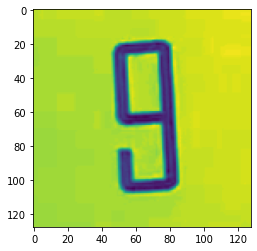

In [ ]:
testing_image = image.load_img('/content/data/extracted_images/nine/10.jpg', color_mode="grayscale",target_size=(128,128))
plt.imshow(testing_image)

testing_image = image.img_to_array(testing_image)
print(testing_image.dtype)
print(testing_image.shape)

testing_image = np.expand_dims(testing_image , axis=0)
print(testing_image.shape)
prediction_result = visual_calculator_model.predict(testing_image)
print("Model Predictions :", labels[np.argmax(prediction_result)] , "\n" )

LOSS - Validation Metrices

In [ ]:
history.history

{'accuracy': [0.6055812835693359,
  0.9923892021179199,
  0.997463047504425,
  0.9977615475654602,
  0.9991046190261841],
 'loss': [1.1520657539367676,
  0.03324638679623604,
  0.009303892031311989,
  0.01037988904863596,
  0.0033813759218901396],
 'val_accuracy': [0.9298981428146362,
  0.9724385738372803,
  0.9880167841911316,
  0.9694427847862244,
  0.9856201410293579],
 'val_loss': [0.2584671080112457,
  0.14648661017417908,
  0.06012129783630371,
  0.1308116465806961,
  0.0688617080450058]}

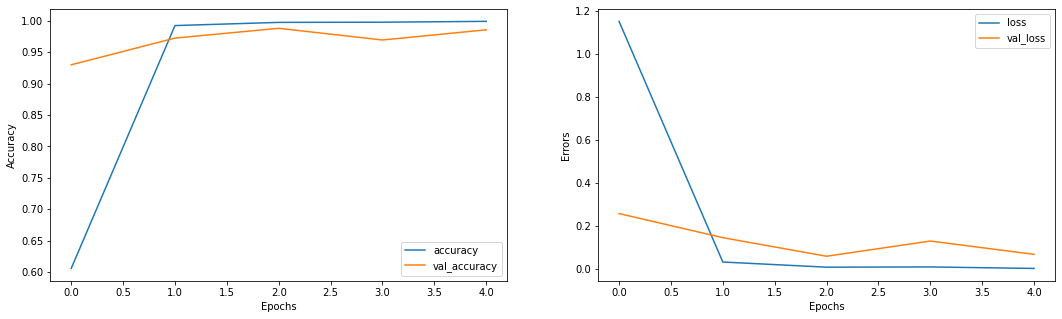

In [ ]:
loss_plotter = plt.figure(figsize=(18,5)) 
mse_plot  = loss_plotter.add_subplot(121)
mse_plot_1  = loss_plotter.add_subplot(122)

mse_plot_1.plot(history.epoch,history.history["loss"],history.history["val_loss"] )
mse_plot_1.set_xlabel("Epochs")
mse_plot_1.set_ylabel('Errors')
mse_plot_1.legend(["loss","val_loss"])


mse_plot.plot(history.epoch,history.history["accuracy"],history.history["val_accuracy"])
mse_plot.set_xlabel("Epochs")
mse_plot.set_ylabel('Accuracy')
mse_plot.legend(["accuracy","val_accuracy"])

## TF Lite

Conversion

In [ ]:
converter = tf.lite.TFLiteConverter.from_keras_model(visual_calculator_model)
converter.optimization = tf.lite.Optimize.OPTIMIZE_FOR_SIZE
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmp0e46rtjw/assets


In [ ]:
open("vc_model.tflite","wb").write(tflite_model)

39361688

Size Comparison

In [ ]:
open("vc_model.tflite","wb").write(tflite_model)
print("Main Model Size :" , round((os.path.getsize("/content/vc_model.h5"))/(1024*1024) ,3 ) , "MB")
print("Lite Model Size :" , round((os.path.getsize("/content/vc_model.tflite"))/(1024*1024),3 ), "MB"  )

Main Model Size : 112.662 MB
Lite Model Size : 37.538 MB


TF Lite Prediction

In [ ]:
interpreter = tf.lite.Interpreter('/content/vc_model.tflite')

input_details   = interpreter.get_input_details()
output_details = interpreter.get_output_details()


print(input_details)

print("-"*10)
print(output_details)
print("-"*10)
print("Input Shape:", input_details[0]['shape'])
print("Input Type:", input_details[0]['dtype'])
print("Output Shape:", output_details[0]['shape'])
print("Output Type:", output_details[0]['dtype'])

[{'name': 'serving_default_conv2d_input:0', 'index': 0, 'shape': array([  1, 128, 128,   1], dtype=int32), 'shape_signature': array([ -1, 128, 128,   1], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
----------
[{'name': 'StatefulPartitionedCall:0', 'index': 25, 'shape': array([ 1, 13], dtype=int32), 'shape_signature': array([-1, 13], dtype=int32), 'dtype': <class 'numpy.float32'>, 'quantization': (0.0, 0), 'quantization_parameters': {'scales': array([], dtype=float32), 'zero_points': array([], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
----------
Input Shape: [  1 128 128   1]
Input Type: <class 'numpy.float32'>
Output Shape: [ 1 13]
Output Type: <class 'numpy.float32'>


In [ ]:
interpreter.allocate_tensors()
interpreter.set_tensor(input_details[0]['index'] , testing_image)
interpreter.invoke()

tflite_prediction_result = interpreter.get_tensor(output_details[0]['index'])
print("Lite Model Predictions :", labels[np.argmax(tflite_prediction_result)] , "\n" )

Lite Model Predictions : nine 

